In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}


In [5]:
# test data
test = pd.read_csv('week1/kc_house_test_data.csv', dtype=dtype_dict)

In [6]:
# train data
train = pd.read_csv('week1/kc_house_train_data.csv', dtype=dtype_dict)

In [7]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
# a list of column names
list(train.columns.values)

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [9]:
# average of each column in train data
train.mean()

price            539366.627934
bedrooms              3.369363
bathrooms             2.115048
sqft_living        2080.029510
sqft_lot          15091.911240
waterfront            0.007651
view                  0.236079
condition             3.410780
grade                 7.655028
sqft_above         1787.844512
sqft_basement       292.184998
yr_built           1971.152727
yr_renovated         83.107973
lat                  47.559313
long               -122.213281
sqft_living15      1985.994995
sqft_lot15        12776.380867
dtype: float64

In [10]:
# subset data by number of bedrooms and bathrooms
bedbath = train.groupby(['bedrooms', 'bathrooms'])

In [11]:
# summary of prices of houses by describe bedrooms and bathrooms
bedbath['price'].describe()

bedrooms  bathrooms       
0         0.00       count          5.000000
                     mean      250390.000000
                     std       113934.457036
                     min       139950.000000
                     25%       142000.000000
                     50%       235000.000000
                     75%       355000.000000
                     max       380000.000000
          0.75       count          1.000000
                     mean      265000.000000
                     std                 NaN
                     min       265000.000000
                     25%       265000.000000
                     50%       265000.000000
                     75%       265000.000000
                     max       265000.000000
          1.00       count          1.000000
                     mean      228000.000000
                     std                 NaN
                     min       228000.000000
                     25%       228000.000000
                     50%    

In [12]:
# average prices of houses by describe bedrooms and bathrooms
bedbath['price'].mean()

bedrooms  bathrooms
0         0.00          250390.000000
          0.75          265000.000000
          1.00          228000.000000
          1.50          288000.000000
          2.50          329975.000000
1         0.00          279666.666667
          0.75          250919.444444
          1.00          324134.150442
          1.25          881750.000000
          1.50          300395.000000
          1.75          359600.000000
          2.00          311200.000000
          2.25          386500.000000
          2.50          680000.000000
2         0.50          191000.000000
          0.75          340347.222222
          1.00          351580.698476
          1.25          468983.333333
          1.50          413890.207048
          1.75          483091.643777
          2.00          439197.204545
          2.25          513512.757282
          2.50          540953.341935
          2.75          564922.800000
          3.00          649145.833333
          3.25          879028

In [13]:
# subset data by number of bedrooms
bed = train.groupby('bedrooms')

In [14]:
# aggregate mean and std of price 
bed['price'].agg([np.mean, np.std, len])

,mean,std,len
bedrooms,,,
0,269290.000000,83896.738117,10
1,323579.224359,154743.617759,156
2,404656.590723,203655.455455,2199
3,464794.220603,261659.292492,7960
4,633195.964266,388496.017561,5513
5,797721.534591,634283.417924,1272
6,796095.349776,712719.415663,223
7,1007030.870968,801304.384428,31
8,1045090.909091,940013.452515,11


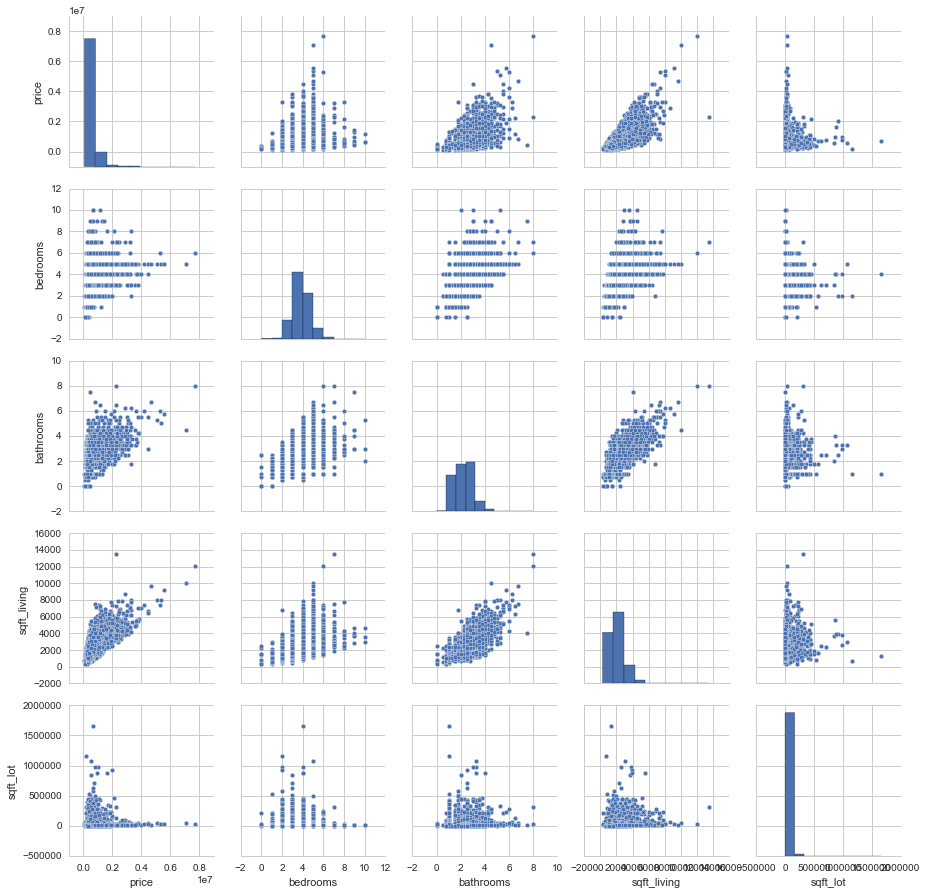

In [15]:
sns.set(style='whitegrid', context='notebook')
cols = ['price','bedrooms','bathrooms','sqft_living','sqft_lot']
sns.pairplot(train[cols],size=2.5)

In [16]:
plt.show()

## Regression model using scikit-learn

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
x = train[['sqft_living']].values
y = train[['price']].values

In [19]:
def simple_linear_regression(input, output):
    """simple linear regression
    input: x, 
    ouput: y,
    return: (intercept, slope)
    """
    slr = LinearRegression()
    slr.fit(input,output)
    print('Slope: %.3f'% slr.coef_[0])
    print('Intercept: %.3f'% slr.intercept_)
    print('r^2: %.3f'% slr.score(input, output, sample_weight=None))
    return (slr, slr.intercept_, slr.coef_[0])

In [20]:
def lin_regplot(x, y, model):
    plt.scatter(x, y, c='red')
    plt.plot(x, model.predict(x), color='black')
    return None

Slope: 281.959
Intercept: -47116.079
r^2: 0.494


(0, 14000)

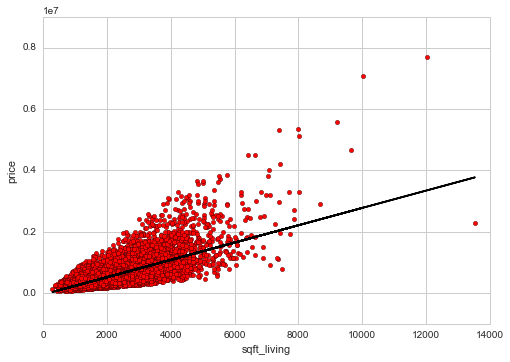

In [21]:
lin_regplot(x, y, simple_linear_regression(x, y)[0])
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.xlim(0,14000)

In [22]:
# predict price for house with 2650 sqft
model = simple_linear_regression(x, y)[0]
model.predict([[2650]])[0][0]

Slope: 281.959
Intercept: -47116.079
r^2: 0.494


700074.84594751382

In [23]:
# predict price for a house costing $800,000 using squarefeet model
(800000-simple_linear_regression(x, y)[1])/simple_linear_regression(x, y)[2]

Slope: 281.959
Intercept: -47116.079
r^2: 0.494
Slope: 281.959
Intercept: -47116.079
r^2: 0.494


array([ 3004.39624515])

## Evaluating linear regression model

In [24]:
slr = LinearRegression()

In [25]:
slr.fit(train[['sqft_living']].values, train[['price']].values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
# using this model to predict 'price' in training data
y_train_pred = slr.predict(train[['sqft_living']].values)

In [27]:
# using this model to predict 'price' in test data
y_test_pred = slr.predict(test[['sqft_living']].values)

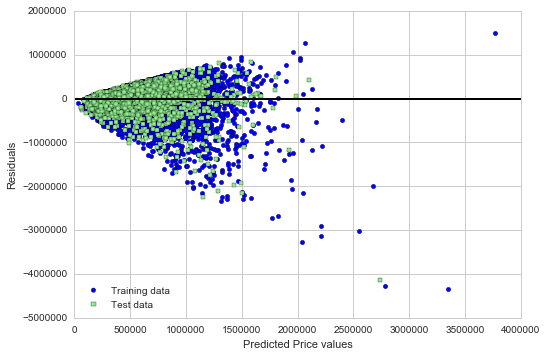

In [28]:
# plot residuals
plt.scatter(y_train_pred, y_train_pred-train[['price']].values, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred-test[['price']].values, c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted Price values')
plt.ylabel('Residuals')
plt.legend(loc='lower left')
plt.hlines(y=0, xmin=0, xmax=4000000, lw=2, color='black')
plt.xlim([0, 4000000])
plt.show()

In [29]:
# find Mean Square Error (MSE)
from sklearn.metrics import mean_squared_error

# MSE of training data
mean_squared_error(train[['price']].values, y_train_pred)

69139343889.627411

In [30]:
# MSE of test data
mean_squared_error(test[['price']].values, y_test_pred)

65122471888.818199

In [31]:
# using the number of bedrooms to predict price. Is it better?
x_train_bed = train[['bedrooms']].values
y_train_bed = train[['price']].values

Slope: 127588.953
Intercept: 109473.178
r^2: 0.098


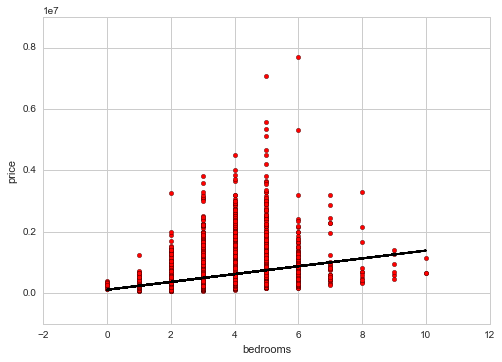

In [32]:
lin_regplot(x_train_bed, y_train_bed, simple_linear_regression(x_train_bed, y_train_bed)[0])
plt.xlabel('bedrooms')
plt.ylabel('price')

In [33]:
# on test data
slr2 = LinearRegression()

In [34]:
slr2.fit(test[['bedrooms']].values, test[['price']].values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
y_test_bed_pred = slr2.predict(test[['bedrooms']].values)

In [36]:
# determine RSS of training data using squarefeet to predict price
np.sum((y_train_pred-train[['price']].values)**2)

1201918354177283.0

In [37]:
# determine RSS of test data using squarefeet to predict price
np.sum((y_test_pred-test[['price']].values)**2)

275402933617812.16

In [38]:
# determine RSS of test data using bedrooms to predict price
np.sum((y_test_bed_pred-test[['price']].values)**2)

490597142829587.5